Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4514 files belonging to 2 classes.
Using 3612 files for training.
Found 4514 files belonging to 2 classes.
Using 902 files for validation.
Class names: ['Brain Tumor', 'Healthy']
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.6691 - auc: 0.7294 - loss: 0.5901

113/113 ━━━━━━━━━━━━━━━━━━━━ 101s 584ms/step - accuracy: 0.6698 - auc: 0.7303 - loss: 0.5893 - val_accuracy: 0.8326 - val_auc: 0.9225 - val_loss: 0.3836
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.8267 - auc: 0.9104 - loss: 0.3924

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 586ms/step - accuracy: 0.8267 - auc: 0.9104 - loss: 0.3923 - val_accuracy: 0.8647 - val_auc: 0.9451 - val_loss: 0.3209
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.8656 - auc: 0.9366 - loss: 0.3371

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 586ms/step - accuracy: 0.8656 - auc: 0.9366 - loss: 0.3372 - val_accuracy: 0.8825 - val_auc: 0.9543 - val_loss: 0.2951
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.8764 - auc: 0.9410 - loss: 0.3203

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 587ms/step - accuracy: 0.8764 - auc: 0.9410 - loss: 0.3203 - val_accuracy: 0.9024 - val_auc: 0.9601 - val_loss: 0.2755
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.8832 - auc: 0.9542 - loss: 0.2867

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 587ms/step - accuracy: 0.8832 - auc: 0.9542 - loss: 0.2868 - val_accuracy: 0.9135 - val_auc: 0.9639 - val_loss: 0.2608
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.8808 - auc: 0.9433 - loss: 0.3099

113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 590ms/step - accuracy: 0.8808 - auc: 0.9433 - loss: 0.3098 - val_accuracy: 0.9013 - val_auc: 0.9658 - val_loss: 0.2587
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.8887 - auc: 0.9549 - loss: 0.2815

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 584ms/step - accuracy: 0.8888 - auc: 0.9549 - loss: 0.2815 - val_accuracy: 0.9213 - val_auc: 0.9671 - val_loss: 0.2467
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9033 - auc: 0.9647 - loss: 0.2524

113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 590ms/step - accuracy: 0.9033 - auc: 0.9646 - loss: 0.2525 - val_accuracy: 0.9146 - val_auc: 0.9687 - val_loss: 0.2418
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.8829 - auc: 0.9568 - loss: 0.2742

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 585ms/step - accuracy: 0.8830 - auc: 0.9568 - loss: 0.2740 - val_accuracy: 0.9279 - val_auc: 0.9689 - val_loss: 0.2378
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.8934 - auc: 0.9606 - loss: 0.2621

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 587ms/step - accuracy: 0.8934 - auc: 0.9606 - loss: 0.2621 - val_accuracy: 0.9191 - val_auc: 0.9699 - val_loss: 0.2285
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 570ms/step - accuracy: 0.9079 - auc: 0.9686 - loss: 0.2367 - val_accuracy: 0.9146 - val_auc: 0.9713 - val_loss: 0.2294
Epoch 12/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 568ms/step - accuracy: 0.9026 - auc: 0.9630 - loss: 0.2510 - val_accuracy: 0.9169 - val_auc: 0.9708 - val_loss: 0.2290
Epoch 13/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.8969 - auc: 0.9662 - loss: 0.2461

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 588ms/step - accuracy: 0.8970 - auc: 0.9662 - loss: 0.2460 - val_accuracy: 0.9290 - val_auc: 0.9719 - val_loss: 0.2171
Epoch 14/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9085 - auc: 0.9683 - loss: 0.2369

113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 589ms/step - accuracy: 0.9085 - auc: 0.9683 - loss: 0.2369 - val_accuracy: 0.9290 - val_auc: 0.9723 - val_loss: 0.2154
Epoch 15/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.9089 - auc: 0.9693 - loss: 0.2323

113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 592ms/step - accuracy: 0.9089 - auc: 0.9693 - loss: 0.2322 - val_accuracy: 0.9346 - val_auc: 0.9734 - val_loss: 0.2103
Epoch 16/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 578ms/step - accuracy: 0.9162 - auc: 0.9688 - loss: 0.2318 - val_accuracy: 0.9246 - val_auc: 0.9735 - val_loss: 0.2109
Epoch 17/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.9061 - auc: 0.9675 - loss: 0.2353

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 585ms/step - accuracy: 0.9061 - auc: 0.9675 - loss: 0.2353 - val_accuracy: 0.9357 - val_auc: 0.9733 - val_loss: 0.2088
Epoch 18/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.9088 - auc: 0.9687 - loss: 0.2311

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 586ms/step - accuracy: 0.9087 - auc: 0.9687 - loss: 0.2311 - val_accuracy: 0.9268 - val_auc: 0.9737 - val_loss: 0.2071
Epoch 19/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9090 - auc: 0.9701 - loss: 0.2269

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 586ms/step - accuracy: 0.9090 - auc: 0.9701 - loss: 0.2270 - val_accuracy: 0.9357 - val_auc: 0.9740 - val_loss: 0.2053
Epoch 20/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9197 - auc: 0.9701 - loss: 0.2215

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 584ms/step - accuracy: 0.9197 - auc: 0.9701 - loss: 0.2214 - val_accuracy: 0.9379 - val_auc: 0.9739 - val_loss: 0.2050
Epoch 21/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9088 - auc: 0.9713 - loss: 0.2204

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 585ms/step - accuracy: 0.9088 - auc: 0.9713 - loss: 0.2203 - val_accuracy: 0.9357 - val_auc: 0.9746 - val_loss: 0.2017
Epoch 22/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9062 - auc: 0.9686 - loss: 0.2307

113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 591ms/step - accuracy: 0.9062 - auc: 0.9687 - loss: 0.2306 - val_accuracy: 0.9390 - val_auc: 0.9751 - val_loss: 0.2009
Epoch 23/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 575ms/step - accuracy: 0.9071 - auc: 0.9677 - loss: 0.2316 - val_accuracy: 0.9346 - val_auc: 0.9749 - val_loss: 0.2079
Epoch 24/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.9233 - auc: 0.9726 - loss: 0.2150

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 587ms/step - accuracy: 0.9233 - auc: 0.9726 - loss: 0.2150 - val_accuracy: 0.9357 - val_auc: 0.9755 - val_loss: 0.1964
Epoch 25/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 569ms/step - accuracy: 0.9215 - auc: 0.9758 - loss: 0.2047 - val_accuracy: 0.9390 - val_auc: 0.9761 - val_loss: 0.1975
Epoch 26/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.9146 - auc: 0.9737 - loss: 0.2111

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 586ms/step - accuracy: 0.9146 - auc: 0.9737 - loss: 0.2112 - val_accuracy: 0.9401 - val_auc: 0.9767 - val_loss: 0.1943
Epoch 27/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 569ms/step - accuracy: 0.9226 - auc: 0.9785 - loss: 0.1932 - val_accuracy: 0.9379 - val_auc: 0.9757 - val_loss: 0.1945
Epoch 28/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.9101 - auc: 0.9713 - loss: 0.2191

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 584ms/step - accuracy: 0.9101 - auc: 0.9713 - loss: 0.2191 - val_accuracy: 0.9424 - val_auc: 0.9760 - val_loss: 0.1942
Epoch 29/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9072 - auc: 0.9718 - loss: 0.2170

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 586ms/step - accuracy: 0.9072 - auc: 0.9718 - loss: 0.2171 - val_accuracy: 0.9401 - val_auc: 0.9763 - val_loss: 0.1920
Epoch 30/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9095 - auc: 0.9729 - loss: 0.2143

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 585ms/step - accuracy: 0.9096 - auc: 0.9729 - loss: 0.2142 - val_accuracy: 0.9390 - val_auc: 0.9764 - val_loss: 0.1918
Epoch 31/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9211 - auc: 0.9764 - loss: 0.2011

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 587ms/step - accuracy: 0.9211 - auc: 0.9764 - loss: 0.2011 - val_accuracy: 0.9424 - val_auc: 0.9761 - val_loss: 0.1908
Epoch 32/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 571ms/step - accuracy: 0.9234 - auc: 0.9769 - loss: 0.1985 - val_accuracy: 0.9401 - val_auc: 0.9762 - val_loss: 0.1941
Epoch 33/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 569ms/step - accuracy: 0.9044 - auc: 0.9678 - loss: 0.2282 - val_accuracy: 0.9290 - val_auc: 0.9770 - val_loss: 0.1940
Epoch 34/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9059 - auc: 0.9677 - loss: 0.2291

113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 589ms/step - accuracy: 0.9060 - auc: 0.9677 - loss: 0.2289 - val_accuracy: 0.9446 - val_auc: 0.9772 - val_loss: 0.1871
Epoch 35/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 569ms/step - accuracy: 0.9240 - auc: 0.9775 - loss: 0.1947 - val_accuracy: 0.9412 - val_auc: 0.9767 - val_loss: 0.1884
Epoch 36/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.9214 - auc: 0.9729 - loss: 0.2109

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 584ms/step - accuracy: 0.9214 - auc: 0.9729 - loss: 0.2108 - val_accuracy: 0.9468 - val_auc: 0.9771 - val_loss: 0.1862
Epoch 37/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 570ms/step - accuracy: 0.9279 - auc: 0.9726 - loss: 0.2091 - val_accuracy: 0.9401 - val_auc: 0.9772 - val_loss: 0.1870
Epoch 38/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 571ms/step - accuracy: 0.9269 - auc: 0.9799 - loss: 0.1880 - val_accuracy: 0.9468 - val_auc: 0.9765 - val_loss: 0.1870
Epoch 39/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.9206 - auc: 0.9767 - loss: 0.1973

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 585ms/step - accuracy: 0.9206 - auc: 0.9767 - loss: 0.1974 - val_accuracy: 0.9412 - val_auc: 0.9772 - val_loss: 0.1849
Epoch 40/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9145 - auc: 0.9713 - loss: 0.2158

113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 591ms/step - accuracy: 0.9145 - auc: 0.9713 - loss: 0.2158 - val_accuracy: 0.9401 - val_auc: 0.9778 - val_loss: 0.1837
Epoch 41/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 575ms/step - accuracy: 0.9277 - auc: 0.9762 - loss: 0.1996 - val_accuracy: 0.9435 - val_auc: 0.9776 - val_loss: 0.1856
Epoch 42/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 570ms/step - accuracy: 0.9166 - auc: 0.9740 - loss: 0.2061 - val_accuracy: 0.9401 - val_auc: 0.9772 - val_loss: 0.1845
Epoch 43/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 572ms/step - accuracy: 0.9061 - auc: 0.9694 - loss: 0.2267 - val_accuracy: 0.9390 - val_auc: 0.9772 - val_loss: 0.1995
Epoch 44/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.9267 - auc: 0.9773 - loss: 0.1925

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 589ms/step - accuracy: 0.9267 - auc: 0.9773 - loss: 0.1926 - val_accuracy: 0.9435 - val_auc: 0.9783 - val_loss: 0.1804
Epoch 45/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 571ms/step - accuracy: 0.9173 - auc: 0.9742 - loss: 0.2034 - val_accuracy: 0.9424 - val_auc: 0.9775 - val_loss: 0.1853
Epoch 46/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 570ms/step - accuracy: 0.9222 - auc: 0.9781 - loss: 0.1907 - val_accuracy: 0.9446 - val_auc: 0.9768 - val_loss: 0.1902
Epoch 47/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 571ms/step - accuracy: 0.9219 - auc: 0.9748 - loss: 0.2048 - val_accuracy: 0.9424 - val_auc: 0.9774 - val_loss: 0.1823
Epoch 48/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9243 - auc: 0.9774 - loss: 0.1928

113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 593ms/step - accuracy: 0.9243 - auc: 0.9774 - loss: 0.1928 - val_accuracy: 0.9424 - val_auc: 0.9777 - val_loss: 0.1801
Epoch 49/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 576ms/step - accuracy: 0.9159 - auc: 0.9744 - loss: 0.2044 - val_accuracy: 0.9424 - val_auc: 0.9779 - val_loss: 0.1802
Epoch 50/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 575ms/step - accuracy: 0.9151 - auc: 0.9733 - loss: 0.2091 - val_accuracy: 0.9390 - val_auc: 0.9772 - val_loss: 0.1833
Epoch 51/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 572ms/step - accuracy: 0.9175 - auc: 0.9751 - loss: 0.2021 - val_accuracy: 0.9424 - val_auc: 0.9768 - val_loss: 0.1832
Epoch 52/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 573ms/step - accuracy: 0.9195 - auc: 0.9742 - loss: 0.2050 - val_accuracy: 0.9446 - val_auc: 0.9764 - val_loss: 0.1927
Epoch 53/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9271 - auc: 0.9805 - loss: 0.1811

113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 592ms/step - accuracy: 0.9271 - auc: 0.9804 - loss: 0.1812 - val_accuracy: 0.9435 - val_auc: 0.9779 - val_loss: 0.1792
Epoch 54/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 575ms/step - accuracy: 0.9316 - auc: 0.9795 - loss: 0.1835 - val_accuracy: 0.9368 - val_auc: 0.9778 - val_loss: 0.1825
Epoch 55/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 575ms/step - accuracy: 0.9264 - auc: 0.9783 - loss: 0.1892 - val_accuracy: 0.9479 - val_auc: 0.9780 - val_loss: 0.1823
Epoch 56/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 572ms/step - accuracy: 0.9291 - auc: 0.9803 - loss: 0.1806 - val_accuracy: 0.9401 - val_auc: 0.9784 - val_loss: 0.1800
Epoch 57/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 573ms/step - accuracy: 0.9253 - auc: 0.9810 - loss: 0.1772 - val_accuracy: 0.9457 - val_auc: 0.9780 - val_loss: 0.1812
Epoch 58/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9221 - auc: 0.9769 - loss: 0.1937

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 589ms/step - accuracy: 0.9222 - auc: 0.9769 - loss: 0.1937 - val_accuracy: 0.9446 - val_auc: 0.9783 - val_loss: 0.1785
Epoch 59/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 569ms/step - accuracy: 0.9301 - auc: 0.9779 - loss: 0.1902 - val_accuracy: 0.9446 - val_auc: 0.9776 - val_loss: 0.1799
Epoch 60/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 567ms/step - accuracy: 0.9189 - auc: 0.9756 - loss: 0.1967 - val_accuracy: 0.9446 - val_auc: 0.9776 - val_loss: 0.1806
Epoch 61/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 569ms/step - accuracy: 0.9282 - auc: 0.9793 - loss: 0.1842 - val_accuracy: 0.9412 - val_auc: 0.9777 - val_loss: 0.1808
Epoch 62/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 568ms/step - accuracy: 0.9201 - auc: 0.9756 - loss: 0.1986 - val_accuracy: 0.9424 - val_auc: 0.9776 - val_loss: 0.1817
Epoch 63/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9195 - auc: 0.9744 - loss: 0.2034

113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 584ms/step - accuracy: 0.9195 - auc: 0.9744 - loss: 0.2033 - val_accuracy: 0.9457 - val_auc: 0.9778 - val_loss: 0.1780
Epoch 64/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 573ms/step - accuracy: 0.9294 - auc: 0.9789 - loss: 0.1855 - val_accuracy: 0.9412 - val_auc: 0.9783 - val_loss: 0.1810
Epoch 65/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 570ms/step - accuracy: 0.9201 - auc: 0.9768 - loss: 0.1955 - val_accuracy: 0.9446 - val_auc: 0.9766 - val_loss: 0.1913
Epoch 66/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 571ms/step - accuracy: 0.9242 - auc: 0.9787 - loss: 0.1872 - val_accuracy: 0.9368 - val_auc: 0.9782 - val_loss: 0.1850
Epoch 67/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 570ms/step - accuracy: 0.9082 - auc: 0.9715 - loss: 0.2148 - val_accuracy: 0.9412 - val_auc: 0.9780 - val_loss: 0.1799
Epoch 68/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 568ms/step - accuracy: 0.9250 - auc: 0.9762 - loss: 0.1946 - val_accuracy: 0.9424 - val_auc: 0.9778 - val_loss: 0.1815
Epoch 69/100
113/113 ━━

Models saved as .h5 files


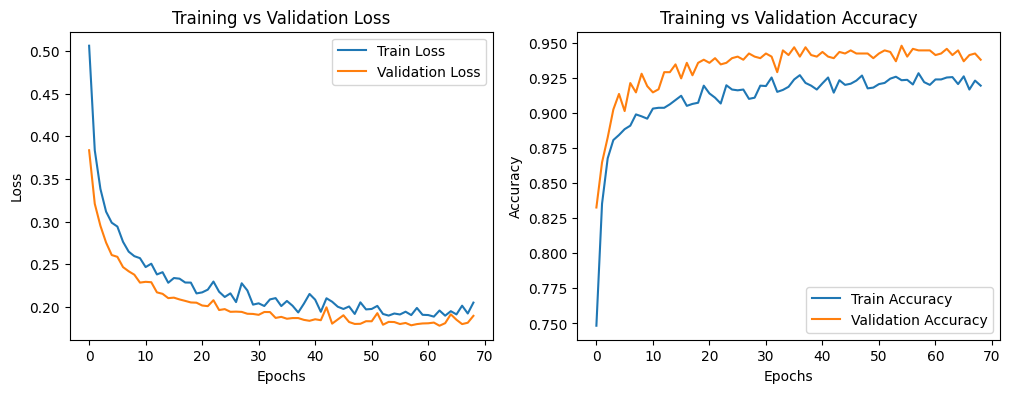

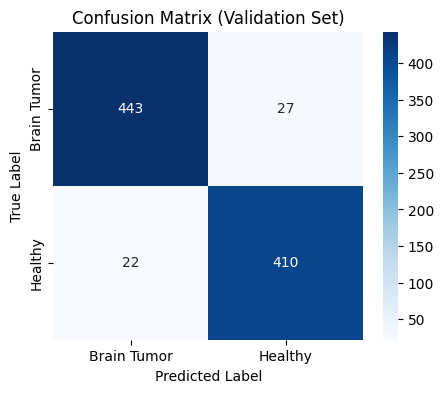

Classification Report:
              precision    recall  f1-score   support

 Brain Tumor       0.95      0.94      0.95       470
     Healthy       0.94      0.95      0.94       432

    accuracy                           0.95       902
   macro avg       0.95      0.95      0.95       902
weighted avg       0.95      0.95      0.95       902



/tmp/ipython-input-1574429078.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = int(labels[0].numpy())
/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


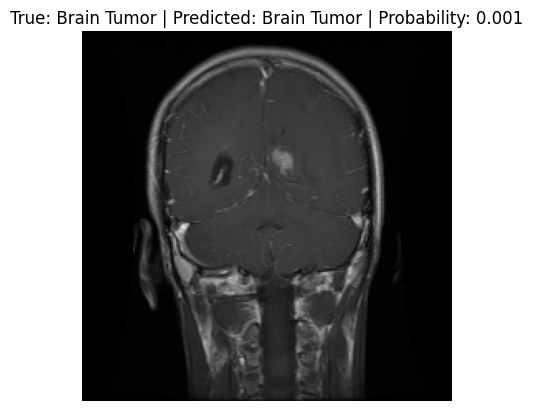

In [53]:
# =========================================================
# Brain Tumor Classification using Xception (ImageNet)
# Binary Classification: Tumor vs No Tumor
# =========================================================

# --------- Imports ---------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# --------- Mount Google Drive ---------
drive.mount('/content/drive')

# --------- Configuration ---------
BASE_DIR = "/content/drive/MyDrive/DATASETS/Brain Tumor Data Set"
IMG_SIZE = (224, 224)          # Required size for Xception
BATCH_SIZE = 32
EPOCHS = 100
SEED = 42

# --------- Load Dataset (Train / Validation Split) ---------
train_ds = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

class_names = train_ds.class_names
print("Class names:", class_names)

# Improve input pipeline performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

# --------- Data Augmentation ---------
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.1),
], name="data_augmentation")

# Xception preprocessing (ImageNet normalization)
preprocess_input = tf.keras.applications.xception.preprocess_input

# --------- Base Model: Xception (Pretrained on ImageNet) ---------
base_model = tf.keras.applications.Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model for transfer learning
base_model.trainable = False

# --------- Build Full Model ---------
inputs = keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)
x = preprocess_input(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# --------- Compile Model ---------
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(name="auc")
    ]
)

model.summary()

# --------- Callbacks ---------
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=6,
        restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/DATASETS/model-saved/xception_best_model.h5",
        monitor="val_loss",
        save_best_only=True
    )
]

# --------- Training (Up to 100 Epochs) ---------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# --------- Save Models (H5 format) ---------
base_model.save("/content/drive/MyDrive/DATASETS/model-saved/xception_base_model.h5")
model.save("/content/drive/MyDrive/DATASETS/model-saved/xception_full_model.h5")
print("Models saved as .h5 files")

# --------- Plot Training / Validation Loss and Accuracy ---------
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()

# --------- Confusion Matrix on Validation Set ---------
y_true = []
y_pred = []

for x_batch, y_batch in val_ds:
    probs = model.predict(x_batch, verbose=0)
    preds = (probs >= 0.5).astype(int)

    y_true.extend(y_batch.numpy().astype(int))
    y_pred.extend(preds.flatten())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# --------- Single Example Inference from Validation ---------
for images, labels in val_ds.take(1):
    img = images[0]
    true_label = int(labels[0].numpy())

    prob = model.predict(tf.expand_dims(img, 0), verbose=0)[0][0]
    pred_label = int(prob >= 0.5)

    plt.imshow(img.numpy().astype("uint8"))
    plt.title(
        f"True: {class_names[true_label]} | "
        f"Predicted: {class_names[pred_label]} | "
        f"Probability: {prob:.3f}"
    )
    plt.axis("off")
    plt.show()
